# **New York Times Headlines Sentiment Analyzer**

New York Times Headlines Sentiment Analyzer, as the name suggests, analyzes and deciphers the sentiments behind the news headlines. It provides the user to search news articles based upon a particular keyword and also asks the user the number of articles they want to be considered while analyzing the dominant sentiment.

In [7]:
#importing the necessary libraries
import json
import time
import requests
import pandas as pd
from textblob import TextBlob

In [47]:
#defining a function to send request and fetch data from New York Time API 
def send_request(query,page_no):
  api_key='E7gUndRRat2yUnLMn1tccCjf7dSJpTY7'
  # https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=yourkey
  base_url = 'https://api.nytimes.com/svc/search/v2/articlesearch'
  url = base_url + '.json?q=' + query +'&page='+str(page_no)+ '&api-key=' + api_key
  response=(requests.get(url).json())
  time.sleep(6)
  return response

In [29]:
query=input("What topic would you like to search? ")
n=int(input("How many articles would you like to search for (max 1000; enter multiples of 10)? "))
page=int(n/10)
df=pd.DataFrame()
for i in range(0,page):
  res=send_request(query,i)['response']['docs']
  df=df.append(pd.DataFrame(res))
df.index=[i for i in range(0,n)]
  

What topic would you like to search? India
How many articles would you like to search for (max 1000; enter multiples of 10)? 30


In [30]:
df.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name',
       'subsection_name', 'byline', 'type_of_material', '_id', 'word_count',
       'uri'],
      dtype='object')

In [31]:
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri
0,Enraged mobs attacked men they linked to acts ...,https://www.nytimes.com/2021/12/19/world/asia/...,Enraged mobs attacked men they linked to acts ...,Two people were lynched over the weekend in th...,A,10,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': '2 Lynchings Reported at Sikh Temples...,"[{'name': 'subject', 'value': 'Temples (Religi...",2021-12-19T17:44:48+0000,article,Foreign,World,Asia Pacific,"{'original': 'By Sameer Yasir', 'person': [{'f...",News,nyt://article/598d6d0a-da20-5bc4-950b-21504e41...,408,nyt://article/598d6d0a-da20-5bc4-950b-21504e41...
1,Food-cart rules spurred by conservative belief...,https://www.nytimes.com/2021/12/13/world/asia/...,Food-cart rules spurred by conservative belief...,"AHMEDABAD, India — The raid came just after su...",A,4,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'India’s Latest Religious and Cultura...,"[{'name': 'glocations', 'value': 'AHMEDABAD (I...",2021-12-13T10:00:19+0000,article,Foreign,World,Asia Pacific,"{'original': 'By Suhasini Raj', 'person': [{'f...",News,nyt://article/c040ebba-904a-56fd-8622-0bfa46d1...,1219,nyt://article/c040ebba-904a-56fd-8622-0bfa46d1...
2,The ambitious project to meet a dire need show...,https://www.nytimes.com/2021/12/21/world/asia/...,The ambitious project to meet a dire need show...,"IMLIDOL, India — The pipes are laid, the taps ...",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'In India’s Water-Stressed Villages, ...","[{'name': 'glocations', 'value': 'India', 'ran...",2021-12-21T14:50:55+0000,article,Foreign,World,Asia Pacific,"{'original': 'By Mujib Mashal, Hari Kumar and ...",News,nyt://article/7da01777-e351-558a-b34a-de1d91fe...,1268,nyt://article/7da01777-e351-558a-b34a-de1d91fe...
3,"Gen. Bipin Rawat, who was killed along with hi...",https://www.nytimes.com/2021/12/08/world/asia/...,"Gen. Bipin Rawat, who was killed along with hi...","NEW DELHI — Gen. Bipin Rawat, India’s highest-...",A,12,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'India’s Top Military General Dies in...,"[{'name': 'subject', 'value': 'Aviation Accide...",2021-12-08T10:19:52+0000,article,Foreign,World,Asia Pacific,{'original': 'By Suhasini Raj and Mujib Mashal...,News,nyt://article/dbbeb507-ef4b-58a8-991d-fc7d6e58...,776,nyt://article/dbbeb507-ef4b-58a8-991d-fc7d6e58...
4,"The man, a 66-year-old South African pharmaceu...",https://www.nytimes.com/2021/12/14/world/asia/...,"The man, a 66-year-old South African pharmaceu...",The police in the southern Indian state of Kar...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Four people are arrested in India af...,"[{'name': 'subject', 'value': 'Coronavirus Omi...",2021-12-14T15:47:19+0000,article,Foreign,World,Asia Pacific,"{'original': 'By Sameer Yasir', 'person': [{'f...",News,nyt://article/92986032-89bf-561f-9ecd-3092034a...,415,nyt://article/92986032-89bf-561f-9ecd-3092034a...


In [32]:
def sentiment_analysis(text):
  return TextBlob(text).sentiment.subjectivity, TextBlob(text).sentiment.polarity

In [45]:
sentiment_table=pd.DataFrame(columns=['Headline No.','Headline','Polarity','Subjectivity'])
net_polarity=0
net_subjectivity=0
for i in range(0,n):
  sentiment_report=sentiment_analysis(df['headline'][i]['main'])
  new_row=[df['headline'][i]['main'],sentiment_report[1],sentiment_report[0]]
  sentiment_table = sentiment_table.append({'Headline No.': int(i+1), 'Headline' : df['headline'][i]['main'], 'Polarity' : sentiment_report[1], 'Subjectivity' : sentiment_report[0]}, ignore_index = True)
  net_subjectivity=net_subjectivity+sentiment_report[0]
  net_polarity=net_polarity+sentiment_report[1]

mean_subjectivity=net_subjectivity/n
mean_polarity=net_polarity/n

if mean_polarity>0:
  print("Dominant Sentiment Detected is Postitive (Mean Polarity Score =",mean_polarity,")")
  print("Subjectivity Score=",mean_subjectivity)
elif mean_polarity<0:
  print("Dominant Sentiment Detected is Negative (Mean Polarity Score =",mean_polarity,")")
  print("Subjectivity Score=",mean_subjectivity)
else:
  print("A Neutral Outlook is detected (Mean Polarity Score =",mean_polarity,")")
  print("Subjectivity Score=",mean_subjectivity)
sentiment_table

Dominant Sentiment Detected is Postitive (Mean Polarity Score = 0.016910774410774414 )
Subjectivity Score= 0.2915235690235691


,Headline No.,Headline,Polarity,Subjectivity
0,1,2 Lynchings Reported at Sikh Temples in India,0.000000,0.000000
1,2,India’s Latest Religious and Cultural Flashpoi...,0.200000,0.416667
2,3,"In India’s Water-Stressed Villages, Modi Seeks...",0.000000,0.000000
3,4,India’s Top Military General Dies in Helicopte...,0.150000,0.366667
4,5,Four people are arrested in India after a man ...,-0.500000,1.000000
5,6,India’s Farmers Call Off Yearlong Protest Agai...,-0.900000,0.700000
6,7,India’s Sex Workers Win Benefits From the Coun...,0.650000,0.450000
7,8,"India and Russia Expand Defense Ties, Despite ...",0.000000,0.000000
8,9,Anger Spreads in Northeastern India After Secu...,-0.700000,0.200000
9,10,Weak Recovery Leaves India’s Middle Class Anxi...,-0.208333,0.541667


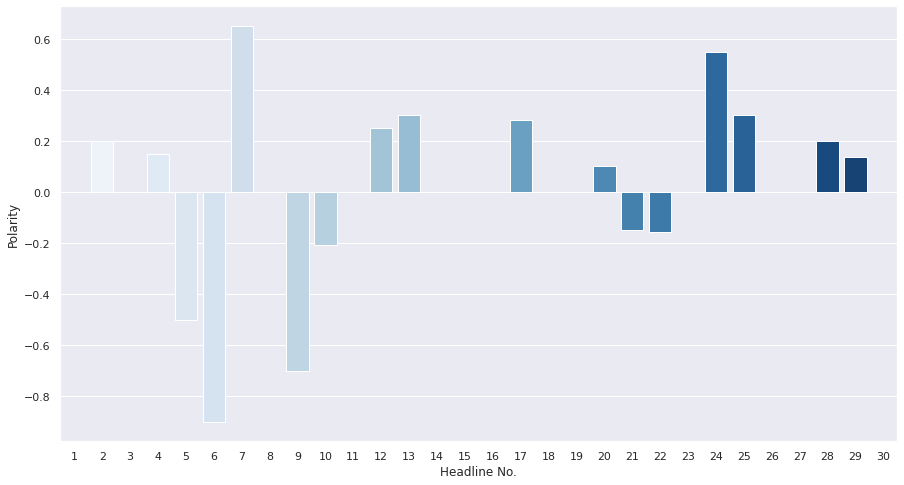

In [46]:
import seaborn as sns
sns.barplot(x = 'Headline No.',
            y = 'Polarity',
            data = sentiment_table,
            palette = "Blues")
sns.set(rc = {'figure.figsize':(15,8)})
